In [31]:
import pandas as pd
import numpy as np
import numpy as np
import re
import seaborn as sns
from scipy import stats
import math
import operator
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, plot

In [32]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
import feather
df = feather.read_dataframe("E:/Users/Johana/Documents/DH/Trabajo Final/principal.feather")
df.sample(2)

,property_type,lat-lon,lat,lon,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,ambientes,provincia,partido,localidad,condicion,price_aprox_usd_levels
107412,2,None,NaN,NaN,1300000.0,NaN,314.000000,314.0,4140.127389,4140.127389,NaN,0.0,4.0,145.0,NaN,NaN
99542,1,None,NaN,NaN,125000.0,125000.0,66.212651,50.0,2500.000000,2500.000000,3.0,0.0,5.0,166.0,NaN,3


In [34]:
df.rename(columns={"Unnamed: 0": "indice"}, inplace=True)

In [35]:
df.isnull().sum()

property_type                  0
lat-lon                    51550
lat                        51550
lon                        51550
price                      20060
price_aprox_usd            23831
surface_total_in_m2         9687
surface_covered_in_m2      11755
price_usd_per_m2           21438
price_per_m2               28236
ambientes                  30280
provincia                      0
partido                     1904
localidad                  68992
condicion                 113219
price_aprox_usd_levels     23831
dtype: int64

In [36]:
columnas_principales = ['price_aprox_usd','property_type','surface_covered_in_m2','provincia']
df_reg = df[columnas_principales]
df_modelo= df_reg.dropna(axis =0 , how = 'any', subset = columnas_principales)
df_modelo.shape

(90745, 4)

In [37]:
df_modelo.sample(2)

,price_aprox_usd,property_type,surface_covered_in_m2,provincia
90283,453000.0,1,104.0,0.0
38968,294000.0,1,141.0,5.0


In [38]:

df_modelo.corr()

,price_aprox_usd,property_type,surface_covered_in_m2,provincia
price_aprox_usd,1.000000,0.297887,0.644484,-0.199034
property_type,0.297887,1.000000,0.480200,-0.087237
surface_covered_in_m2,0.644484,0.480200,1.000000,-0.159531
provincia,-0.199034,-0.087237,-0.159531,1.000000


In [39]:
df_modelo.describe() # no tiene media 1 hay que normalizar

,price_aprox_usd,property_type,surface_covered_in_m2,provincia
count,90745.000000,90745.000000,90745.000000,90745.000000
mean,192098.084782,1.310100,95.195339,4.649281
std,146287.306016,0.609041,84.660865,5.807697
min,0.000000,0.000000,0.000000,0.000000
25%,89733.880000,1.000000,40.000000,1.000000
50%,140000.000000,1.000000,65.000000,3.000000
75%,250000.000000,2.000000,127.000000,5.000000
max,815000.000000,3.000000,485.000000,27.000000


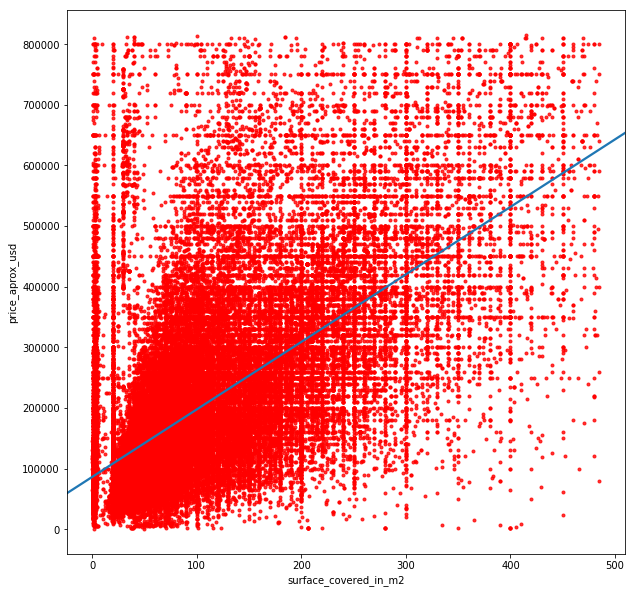

In [18]:
#reviso relación con alguna variable
sns.regplot(df_modelo.surface_covered_in_m2, df_modelo.price_aprox_usd, order=1, ci=None, scatter_kws={'color':'r', 's':9})

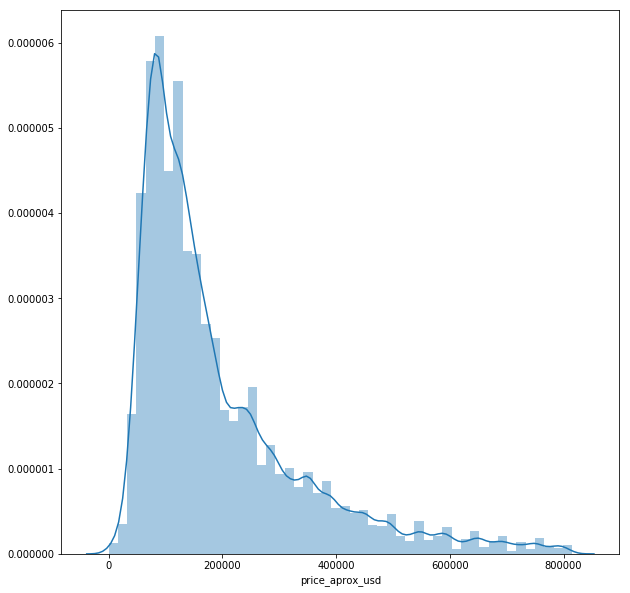

In [19]:
#reviso distribución de variable dependiente

sns.distplot(df_modelo['price_aprox_usd'])

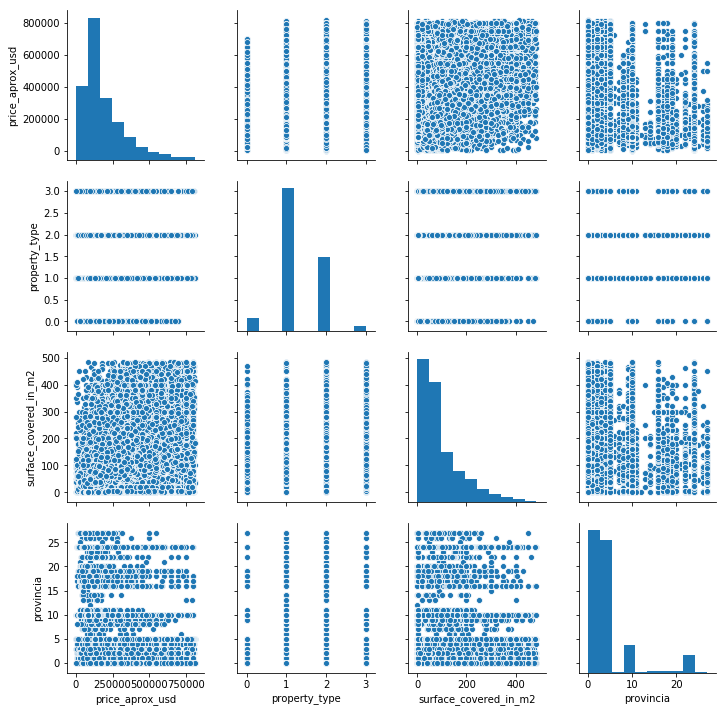

In [74]:
sns.pairplot(df_modelo)

In [40]:
#convierto a dummies
df_dummies = pd.get_dummies(df_modelo, columns = [ 'provincia', 'property_type'], drop_first = True)
df_dummies.columns

Index(['price_aprox_usd', 'surface_covered_in_m2', 'provincia_1.0',
       'provincia_2.0', 'provincia_3.0', 'provincia_4.0', 'provincia_5.0',
       'provincia_6.0', 'provincia_7.0', 'provincia_8.0', 'provincia_9.0',
       'provincia_10.0', 'provincia_11.0', 'provincia_12.0', 'provincia_13.0',
       'provincia_14.0', 'provincia_15.0', 'provincia_16.0', 'provincia_17.0',
       'provincia_18.0', 'provincia_19.0', 'provincia_20.0', 'provincia_21.0',
       'provincia_22.0', 'provincia_23.0', 'provincia_24.0', 'provincia_25.0',
       'provincia_26.0', 'provincia_27.0', 'property_type_1',
       'property_type_2', 'property_type_3'],
      dtype='object')

In [41]:
df_dummies.shape

(90745, 32)

In [42]:
#variable dependiente
#y = df.price_aprox_usd
y = pd.DataFrame(df_dummies.price_aprox_usd)

x= df_dummies.drop(columns=['price_aprox_usd'])

print (y.shape)
print (x.shape)
x.sample(1)

(90745, 1)
(90745, 31)


,surface_covered_in_m2,provincia_1.0,provincia_2.0,provincia_3.0,provincia_4.0,provincia_5.0,provincia_6.0,provincia_7.0,provincia_8.0,provincia_9.0,...,provincia_21.0,provincia_22.0,provincia_23.0,provincia_24.0,provincia_25.0,provincia_26.0,provincia_27.0,property_type_1,property_type_2,property_type_3
55506,300.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
#normalizo por min-max
from sklearn import datasets, preprocessing
minmaxscaler = preprocessing.MinMaxScaler()
xs = minmaxscaler.fit_transform(x)

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.



In [44]:
xs


array([[0.08247423, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11340206, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00618557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08041237, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09896907, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15876289, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [45]:
X = pd.DataFrame(xs, columns=x.columns)
X.sample(2)

,surface_covered_in_m2,provincia_1.0,provincia_2.0,provincia_3.0,provincia_4.0,provincia_5.0,provincia_6.0,provincia_7.0,provincia_8.0,provincia_9.0,...,provincia_21.0,provincia_22.0,provincia_23.0,provincia_24.0,provincia_25.0,provincia_26.0,provincia_27.0,property_type_1,property_type_2,property_type_3
3738,0.226804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47403,0.061856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
X.corr()

,surface_covered_in_m2,provincia_1.0,provincia_2.0,provincia_3.0,provincia_4.0,provincia_5.0,provincia_6.0,provincia_7.0,provincia_8.0,provincia_9.0,...,provincia_21.0,provincia_22.0,provincia_23.0,provincia_24.0,provincia_25.0,provincia_26.0,provincia_27.0,property_type_1,property_type_2,property_type_3
surface_covered_in_m2,1.000000,-0.012528,0.044917,-0.068722,0.020033,-0.177394,0.006962,0.012463,-0.022227,0.020207,...,0.005945,0.007459,-0.000935,-0.087862,0.007050,0.002345,-0.014280,-0.540981,0.582547,0.032803
provincia_1.0,-0.012528,1.000000,-0.105264,-0.090714,-0.038492,-0.186472,-0.003168,-0.005403,-0.010555,-0.020263,...,-0.001910,-0.011976,-0.003938,-0.067986,-0.001654,-0.004963,-0.011227,-0.102481,0.080111,-0.006264
provincia_2.0,0.044917,-0.105264,1.000000,-0.115381,-0.048958,-0.237178,-0.004029,-0.006872,-0.013425,-0.025773,...,-0.002429,-0.015233,-0.005009,-0.086473,-0.002104,-0.006313,-0.014280,-0.139295,0.133938,0.016648
provincia_3.0,-0.068722,-0.090714,-0.115381,1.000000,-0.042191,-0.204395,-0.003472,-0.005923,-0.011570,-0.022211,...,-0.002094,-0.013127,-0.004316,-0.074520,-0.001813,-0.005440,-0.012306,0.039068,-0.041214,-0.010972
provincia_4.0,0.020033,-0.038492,-0.048958,-0.042191,1.000000,-0.086729,-0.001473,-0.002513,-0.004909,-0.009425,...,-0.000888,-0.005570,-0.001832,-0.031620,-0.000769,-0.002308,-0.005222,-0.052468,0.065837,-0.004627
provincia_5.0,-0.177394,-0.186472,-0.237178,-0.204395,-0.086729,1.000000,-0.007137,-0.012174,-0.023783,-0.045657,...,-0.004304,-0.026985,-0.008873,-0.153184,-0.003727,-0.011183,-0.025297,0.316311,-0.359672,0.036363
provincia_6.0,0.006962,-0.003168,-0.004029,-0.003472,-0.001473,-0.007137,1.000000,-0.000207,-0.000404,-0.000776,...,-0.000073,-0.000458,-0.000151,-0.002602,-0.000063,-0.000190,-0.000430,-0.009537,0.011883,-0.001730
provincia_7.0,0.012463,-0.005403,-0.006872,-0.005923,-0.002513,-0.012174,-0.000207,1.000000,-0.000689,-0.001323,...,-0.000125,-0.000782,-0.000257,-0.004439,-0.000108,-0.000324,-0.000733,-0.013649,0.014993,0.004703
provincia_8.0,-0.022227,-0.010555,-0.013425,-0.011570,-0.004909,-0.023783,-0.000404,-0.000689,1.000000,-0.002584,...,-0.000244,-0.001527,-0.000502,-0.008671,-0.000211,-0.000633,-0.001432,-0.033739,0.031310,0.025611
provincia_9.0,0.020207,-0.020263,-0.025773,-0.022211,-0.009425,-0.045657,-0.000776,-0.001323,-0.002584,1.000000,...,-0.000468,-0.002932,-0.000964,-0.016646,-0.000405,-0.001215,-0.002749,-0.046362,0.038983,-0.001842


In [47]:
#estudiamos VIF para cuantificar la intensidad de la multicolinealidad
# mide hasta qué punto la varianza de un coeficiente estimado se incrementa a causa de la colinealidad.

import statsmodels.stats.outliers_influence as oi

for i in range(len(X.columns)):
    vif_col = oi.variance_inflation_factor(np.matrix(X), i)
    print('columna ' + str(i) + " " + str(vif_col))

columna 0 3.334312520231646
columna 1 1.2306272443415889
columna 2 1.3857966717238963
columna 3 1.3178540154405947
columna 4 1.0632277467315243
columna 5 2.222518968758207
columna 6 1.0005243728453703
columna 7 1.0014328649708235
columna 8 1.0092450225940612
columna 9 1.0146614403250405
columna 10 1.2920280210477924
columna 11 1.0047524949539617
columna 12 1.000063982993979
columna 13 1.0004747355441417
columna 14 1.0011197396879397
columna 15 1.0001165769057734
columna 16 1.0177279164385158
columna 17 1.0168125382030704
columna 18 1.0064197279184697
columna 19 1.0137937167539535
columna 20 1.0036179656539037
columna 21 1.0001901264683093
columna 22 1.0087723117087388
columna 23 1.0010982739312038
columna 24 1.2235080107473972
columna 25 1.0001555529780632
columna 26 1.0011561954722146
columna 27 1.0060729390590282
columna 28 3.5286196316329503
columna 29 3.6088100393777838
columna 30 1.1519764743434635


In [49]:
import statsmodels.api as sm
#agrego el intercepto
X_intercept = sm.add_constant(X)

#fix
y.index = range(y.shape[0])

# Fit and summarize OLS model (OLS = ordinary least square linear regression)
model_intercept = sm.OLS(y, X_intercept)
model_intercept = model_intercept.fit()
print (model_intercept.summary())
predictions_intercept = model_intercept.predict(X_intercept)

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2729.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:19:37   Log-Likelihood:            -1.1781e+06
No. Observations:               90745   AIC:                         2.356e+06
Df Residuals:                   90713   BIC:                         2.357e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.535e+

In [50]:
#Calculo de residuos

predictions_intercept_df = pd.DataFrame(predictions_intercept, columns=['price_aprox_usd'])
residuos_intercept = y - predictions_intercept_df
print(residuos_intercept.mean())

#otra forma:
#model_intercept.resid.mean()

price_aprox_usd    1.209009e-09
dtype: float64


In [51]:
model_intercept.resid.mean()

1.209008620991458e-09

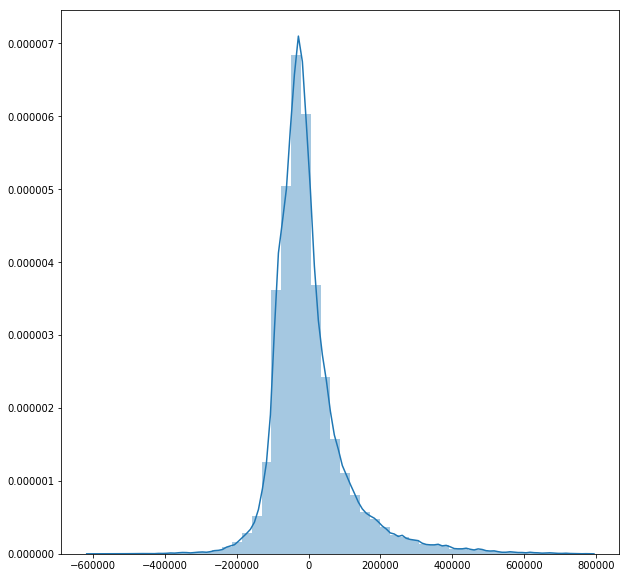

In [52]:
#verifico la distribución y la media de los residuos.
sns.distplot(residuos_intercept)

In [54]:
#Me genera una matrix polinomial, obtengo los Beta, cuando es necesario hacerlo?
# se hace despues de normalizar y antes de dividir los datos entre train y test?
#se hace para obtener un mejor ajuste del error. Obtengo mis errores sin el polinomio, después obtengo con el polinomio y
#comparo los errores el que me de mejor es el que mejor se ajusta y dejo ese para correr el modelo.
X2 = PolynomialFeatures(2,include_bias=False,interaction_only=False).fit_transform(X_intercept)
X_intercept.shape, X2.shape

((90745, 32), (90745, 560))

In [59]:
model_2 = sm.OLS(y, X2)
model_2 = model_2.fit()
print (model_2.summary())
predictions_2 = model_2.predict(X2)

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     866.8
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:40:03   Log-Likelihood:            -1.1731e+06
No. Observations:               90745   AIC:                         2.347e+06
Df Residuals:                   90623   BIC:                         2.348e+06
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.493e+16   8.74e+16     -0.400      0.6

In [60]:
predictions_2_df = pd.DataFrame(predictions_2, columns=['price_aprox_usd'])
residuos_2 = y - predictions_2_df
print(residuos_2.mean())

price_aprox_usd   -99.300335
dtype: float64


In [56]:
model_2.resid.mean()

-99.3003353054605

In [61]:
#verifico homocedasticidad con base en p_value
#supuesto: Para cualquier valor de la variable explicativa, el error tienen la misma varianza
import statsmodels.stats.api as sms

resids_standardized = model_intercept.get_influence().resid_studentized_internal

resids = model_intercept.resid

bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model_intercept.model.exog), 
                       columns=['value'],
                       index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])


gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model_intercept.model.exog)[:-1],
                       columns=['value'],
                       index=['F statistic', 'p-value'])

print('\n Breusch-Pagan test ----')
print(bp_test)
print('\n Goldfeld-Quandt test ----')
print(gq_test)
#los dos test dan significados opuestos, uno es significativo y otro no

E:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning:

invalid value encountered in sqrt




 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  2722.495465
p-value                           0.000000
f-value                          90.506814
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  0.742708
p-value      1.000000


[Text(0, 0.5, 'sqrt(abs(Residuals))'), Text(0.5, 0, 'Fitted Values')]

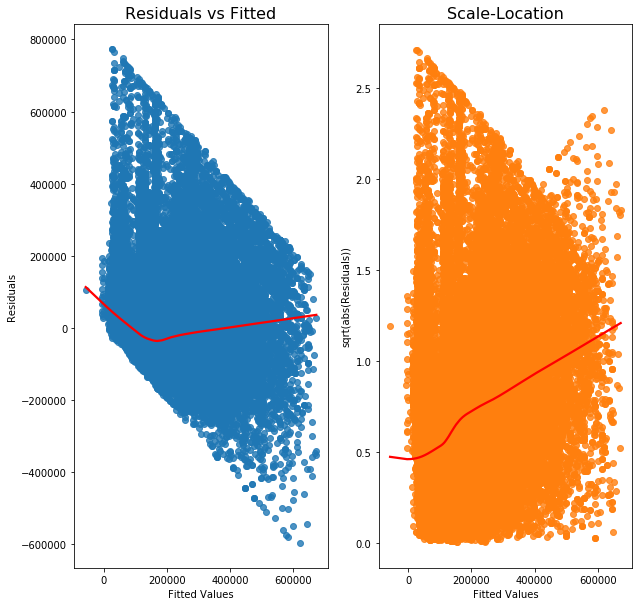

In [65]:
#Vemos los gráficos de los residuos, no obtengo una linea horizontal (supuesto de homocedasticidad)
fig, ax = plt.subplots(1,2)

fitted_vals = predictions_intercept

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

E:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



Jarque-Bera test ---- statistic: 232918.3975, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8494, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.6260, p-value: 0.0000
Anderson-Darling test ---- statistic: 3511.3651, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected.


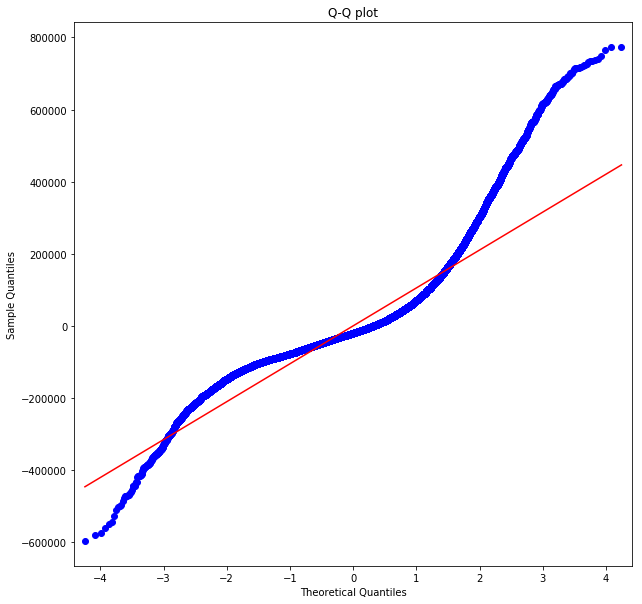

In [66]:

# verifico adicional con un grafico de datos reales vs simulados. No me una recta.
#el grafico es en quantiles

sm.ProbPlot(model_intercept.resid).qqplot(line='s');
plt.title('Q-Q plot');

jb = stats.jarque_bera(model_intercept.resid)
sw = stats.shapiro(model_intercept.resid)
ad = stats.anderson(model_intercept.resid, dist='norm')
ks = stats.kstest(model_intercept.resid, 'norm')

print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected.')

In [73]:
#verifico el R2 y el error de la regresion
print('r2: ' + str(model_intercept.rsquared))
rss = np.sum(model_intercept.resid**2)
print('rss: ' + str(rss))

r2: 0.48255097459463814
rss: 1004844307776425.1


In [67]:
#Divido los datos en train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(63521, 31) (63521, 1)
(27224, 31) (27224, 1)


In [68]:
#definimos Cv con un random antes de hacer cada particion 
CVL = KFold(n_splits=5, shuffle=True)

In [69]:
#genero la regresión lineal
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
y = y_test
y_pred = lm.predict(X_test)
rmse_lineal = np.sqrt(mean_squared_error(y, y_pred))
rmse_lineal

105316.81918844476

In [70]:
#obtengo los coheficientes
lm.get_params()
lm.coef_

array([[ 5.48075243e+05, -6.15850004e+04, -4.88582705e+04,
        -5.61000946e+04, -6.21121895e+04,  1.29578980e+04,
         3.23064340e+03, -1.00425258e+05,  7.84138779e+04,
        -5.20749486e+04, -8.00696116e+04, -9.24176766e+04,
        -2.94676283e-10,  6.55980686e+04, -8.33764421e+04,
        -2.64048105e+05, -7.64831170e+04, -5.83737052e+04,
        -2.87779747e+04,  2.52265575e+04, -9.45710111e+04,
         1.53320344e+05, -7.33218214e+04, -7.68164191e+04,
        -7.71246422e+04, -7.95957683e+04, -5.88302605e+04,
        -7.76023671e+04,  3.99499154e+04,  3.06294353e+04,
         4.67602983e+04]])

In [71]:
#genero la regresion de Ridge

alfas_ridge = np.linspace(0.001, 0.3, 300)
lm_ridge_cv= RidgeCV(alphas=alfas_ridge, cv=CVL, normalize=False, fit_intercept = True)
lm_ridge_cv.fit(X_train, y_train)
print('Alpha Ridge:', lm_ridge_cv.alpha_)   
#utilizo el alfa del paso anterior y  fiteo con un intercepto
y = y_train
model = Ridge(lm_ridge_cv.alpha_, normalize=False, fit_intercept = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
np.sqrt(mean_squared_error(y, y_pred))

Alpha Ridge: 0.3


105213.16815658283

In [72]:
#genero la regresion de Lasso

alfas_lasso = np.linspace(0.1, 0.5, 300)
lm_lasso_cv = LassoCV(alphas=alfas_lasso, cv=CVL, normalize=False, fit_intercept = True)
lm_lasso_cv.fit(X_train, y_train)
print('Alpha LASSO:', lm_lasso_cv.alpha_)

y = y_train
model = Ridge(lm_lasso_cv.alpha_, normalize=False, fit_intercept = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
np.sqrt(mean_squared_error(y, y_pred))

E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Alpha LASSO: 0.5


105213.54352316636

In [ ]:
#comparamos el error de test con el error de training para veriicar el modelo con menor diferencia

#pendiente comparar los errores, los alpha y revisar los coheficientes finales.